# Function Approximation 

## Libraries

In [481]:
import sympy as sp
from IPython.display import display
from sympy.plotting import plot
from ipywidgets import interact
sp.init_printing(order='lex',use_latex='mathjax')

In [451]:
polyCoef = [a,b,c,d,e,f,g,h,i,j,k,l,m,n] = sp.symbols("a b c d e f g h i j k l m n", integer=True )
polyVars = [x,y,z] = sp.symbols("x y z", integer=True )

In [452]:

def buildPolynomial(polyVar,degree)-> "ax^d + bx^d-1 + ... + c":
    tmp = 0
    
    for deg in range(degree+1):
        tmp += polyCoef[deg]*polyVar**(degree-deg)
    
    return tmp
    
    
def polynomialApproximation(polyVar,xs,ys,degree=None,debug=False)-> "[expression,fn]":
    
    eqns = []
    
    if degree == None:
        degree = len(xs)
    
    fundPoly = buildPolynomial(polyVar,degree)
    
    if debug:
        display(fundPoly)
    for x,y in zip(xs,ys):
        eqns.append(sp.Eq(fundPoly.subs(polyVar,x),y))

    if debug: 
        display(eqns)
        
    sln = sp.solve(eqns)
    
    if debug: 
        display(sln)
        
    expr = fundPoly.subs(sln)
    
    if debug:
        display(expr)
        
    return [expr,sp.lambdify(polyVar, expr)]



2⋅x

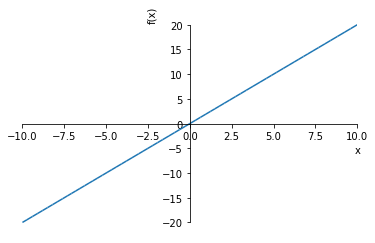

In [480]:
xs = [1,2,3,4,5,6,7,8,9,10]
ys = [2,4,6,8,10,12,14,16]
appxFn = polynomialApproximation(polyVars[0],xs,ys,degree=2,debug = False)
display(appxFn[0])
plot(appxFn[0])


In [476]:
for i in range(10):
    print(appxFn[1](i))

0
2
4
6
8
10
12
14
16
18


In [501]:

@interact
def intFunc(x1=1.0,x2=2,x3=3,x4=4,y1=1,y2=2,y3=3,y4=4):
    
    xs = [x1,x2,x3,x4]
    ys = [y1,y2,y3,y4]
    print(x1)

    appxFn = polynomialApproximation(polyVars[0],xs,ys,degree=2,debug = True)
    display(appxFn[0])
    plot(appxFn[0])

interact(intFunc,x1=[-10,10,0.5],x2=[-10,10,0.5],x3=[-10,10,0.5],x4=[-10,10,0.5],
                 y1=[-10,10,0.5],y2=[-10,10,0.5],y3=[-10,10,0.5],y4=[-10,10,0.5])

-10


   2          
a⋅x  + b⋅x + c

[100⋅a - 10⋅b + c = -10, 100⋅a - 10⋅b + c = -10, 100⋅a - 10⋅b + c = -10, 100⋅a
 - 10⋅b + c = -10]

⎧   b     c    1 ⎫
⎨a: ── - ─── - ──⎬
⎩   10   100   10⎭

           2 ⎛b     c    1 ⎞
b⋅x + c + x ⋅⎜── - ─── - ──⎟
             ⎝10   100   10⎠

           2 ⎛b     c    1 ⎞
b⋅x + c + x ⋅⎜── - ─── - ──⎟
             ⎝10   100   10⎠

ValueError: The same variable should be used in all univariate expressions being plotted.

<function __main__.intFunc>

In [494]:
xs = [0,1,2,3,4,5,6,7,8]
ys = [2,3,5,6,7,8,10]
appxFn = polynomialApproximation(polyVars[0],xs,ys,degree=None,debug = True)

   9      8      7      6      5      4      3      2          
a⋅x  + b⋅x  + c⋅x  + d⋅x  + e⋅x  + f⋅x  + g⋅x  + h⋅x  + i⋅x + j

[j = 2, a + b + c + d + e + f + g + h + i + j = 3, 512⋅a + 256⋅b + 128⋅c + 64⋅
d + 32⋅e + 16⋅f + 8⋅g + 4⋅h + 2⋅i + j = 5, 19683⋅a + 6561⋅b + 2187⋅c + 729⋅d +
 243⋅e + 81⋅f + 27⋅g + 9⋅h + 3⋅i + j = 6, 262144⋅a + 65536⋅b + 16384⋅c + 4096⋅
d + 1024⋅e + 256⋅f + 64⋅g + 16⋅h + 4⋅i + j = 7, 1953125⋅a + 390625⋅b + 78125⋅c
 + 15625⋅d + 3125⋅e + 625⋅f + 125⋅g + 25⋅h + 5⋅i + j = 8, 10077696⋅a + 1679616
⋅b + 279936⋅c + 46656⋅d + 7776⋅e + 1296⋅f + 216⋅g + 36⋅h + 6⋅i + j = 10]

⎧            h     49⋅i    203               7⋅h   1009⋅i    7523             
⎨b: -21⋅a + ─── + ───── - ──────, c: 175⋅a - ─── - ────── + ──────, d: -735⋅a 
⎩           720   14400   864000             240   14400    864000            

  35⋅h   1631⋅i   19357               49⋅h   6503⋅i   116581               203
+ ──── + ────── - ──────, e: 1624⋅a - ──── - ────── + ──────, f: -1764⋅a + ───
  144     2880    172800               48     2880    172800                 9

⋅h   16219⋅i   429443             49⋅h   13489⋅i   522083      ⎫
── + ─────── - ──────, g: 720⋅a - ──── - ─────── + ──────, j: 2⎬
0      3600    216000              20      3600    216000      ⎭

   9      2          8 ⎛         h     49⋅i    203  ⎞    7 ⎛        7⋅h   1009
a⋅x  + h⋅x  + i⋅x + x ⋅⎜-21⋅a + ─── + ───── - ──────⎟ + x ⋅⎜175⋅a - ─── - ────
                       ⎝        720   14400   864000⎠      ⎝        240   1440

⋅i    7523 ⎞    6 ⎛         35⋅h   1631⋅i   19357 ⎞    5 ⎛         49⋅h   6503
── + ──────⎟ + x ⋅⎜-735⋅a + ──── + ────── - ──────⎟ + x ⋅⎜1624⋅a - ──── - ────
0    864000⎠      ⎝         144     2880    172800⎠      ⎝          48     288

⋅i   116581⎞    4 ⎛          203⋅h   16219⋅i   429443⎞    3 ⎛        49⋅h   13
── + ──────⎟ + x ⋅⎜-1764⋅a + ───── + ─────── - ──────⎟ + x ⋅⎜720⋅a - ──── - ──
0    172800⎠      ⎝            90      3600    216000⎠      ⎝         20      

489⋅i   522083⎞    
───── + ──────⎟ + 2
3600    216000⎠    

a⋅x + c

x

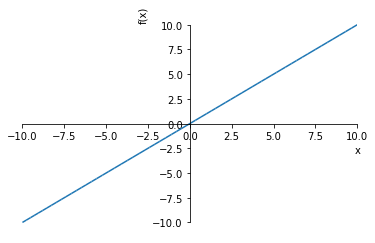

In [402]:
xs = [0,1,2,3,4,5,6,7,8]
appxFn = polynomialApproximation(polyVars[0],xs,xs,degree=1,debug = True)
plot(appxFn[0])

In [305]:
cc = 0
cc += polyCoef[0]+3
dd = cc * polyCoef[1]
dd

b⋅(a + 3)

In [302]:

systemOfEqn = [sp.Eq(a*x**3 + b*x**2  +c*x + d,2),sp.Eq(a*x**3+ b*x**2  + c*x + d,3),
               sp.Eq(a*x**3+ b*x**2  + c*x + d,5),sp.Eq(a*x**3 + b*x**2 + c*x + d,6)]

for eqn in systemOfEqn:
    display(eqn)

   3      2              
a⋅x  + b⋅x  + c⋅x + d = 2

   3      2              
a⋅x  + b⋅x  + c⋅x + d = 3

   3      2              
a⋅x  + b⋅x  + c⋅x + d = 5

   3      2              
a⋅x  + b⋅x  + c⋅x + d = 6

In [227]:
for (idx,eqn),xVal in zip(enumerate(systemOfEqn),xs):
    systemOfEqn[idx] = eqn.subs(x,xVal)
    display(systemOfEqn[idx])

d = 2

a + b + c + d = 3

8⋅a + 4⋅b + 2⋅c + d = 5

27⋅a + 9⋅b + 3⋅c + d = 6

In [230]:
res = sp.solve(systemOfEqn,a,b,c,d)
res

{a: -1/3, b: 3/2, c: -1/6, d: 2}

In [237]:
eqn = (a*x**3 + b*x**2  +c*x + d).subs(res)
eqn

   3      2        
  x    3⋅x    x    
- ── + ──── - ─ + 2
  3     2     6    

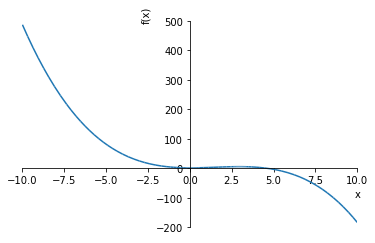

In [240]:
plot(eqn)

In [234]:
eqn.subs(x,4)

4

In [200]:
res

⎧   -d                    11⋅d   7⎫
⎨a: ───, b: d - 1/2, c: - ──── + ─⎬
⎩    6                     6     2⎭

In [80]:
k = (1/2)*x**2 + (1/2)*x + 2 

In [88]:
k.subs(x,3)

8.00000000000000